### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from datetime import datetime

### Read city file

In [2]:
Nahariyya = pd.read_csv('./cities/Nahariyya.csv')

### Check rows, columns and data types

In [3]:
Nahariyya.head()

,Unnamed: 0,datetime,Nahariyya_humidity,Nahariyya_pressure,Nahariyya_temperature,Nahariyya_weather_description,Nahariyya_wind_direction,Nahariyya_wind_speed
0,0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2012-10-01 13:00:00,51.0,1013.0,304.4,sky is clear,336.0,2.0
2,2,2012-10-01 14:00:00,51.0,1013.0,304.4,sky is clear,336.0,2.0
3,3,2012-10-01 15:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0
4,4,2012-10-01 16:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0


In [4]:
Nahariyya.dtypes

Unnamed: 0                         int64
datetime                          object
Nahariyya_humidity               float64
Nahariyya_pressure               float64
Nahariyya_temperature            float64
Nahariyya_weather_description     object
Nahariyya_wind_direction         float64
Nahariyya_wind_speed             float64
dtype: object

### Data Cleaning
#### 1. Remove unwanted columns and formating of columns

In [5]:
Nahariyya.drop('Unnamed: 0', axis=1, inplace=True) #Remove 'Unnamed: 0' column
Nahariyya['datetime']=pd.to_datetime(Nahariyya['datetime']) #change format of 'datetime' from string to date
Nahariyya.head()

,datetime,Nahariyya_humidity,Nahariyya_pressure,Nahariyya_temperature,Nahariyya_weather_description,Nahariyya_wind_direction,Nahariyya_wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,51.0,1013.0,304.4,sky is clear,336.0,2.0
2,2012-10-01 14:00:00,51.0,1013.0,304.4,sky is clear,336.0,2.0
3,2012-10-01 15:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0
4,2012-10-01 16:00:00,51.0,1013.0,304.4,overcast clouds,336.0,2.0


#### 2. Remove NaN values

In [6]:
Nahariyya.isna().sum() #Checking for total NaN values for each column

datetime                           0
Nahariyya_humidity               817
Nahariyya_pressure               795
Nahariyya_temperature            797
Nahariyya_weather_description    793
Nahariyya_wind_direction         793
Nahariyya_wind_speed             794
dtype: int64

In [7]:
Nahariyya_nan = Nahariyya[Nahariyya.isna().any(axis=1)]
Nahariyya_nan.tail(795) #checking for multiple NaN values per row

,datetime,Nahariyya_humidity,Nahariyya_pressure,Nahariyya_temperature,Nahariyya_weather_description,Nahariyya_wind_direction,Nahariyya_wind_speed
39214,2017-03-23 10:00:00,63.0,1009.0,292.690,sky is clear,340.0,NaN
42559,2017-08-09 19:00:00,NaN,1019.0,300.893,sky is clear,0.0,0.0
42560,2017-08-09 20:00:00,NaN,1019.0,300.893,sky is clear,0.0,0.0
44461,2017-10-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
44462,2017-10-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Nahariyya = Nahariyya[Nahariyya.isnull().sum(axis=1) <= 1] #Removing rows with multiple NaN values

In [9]:
Nahariyya.shape

(44458, 7)

In [10]:
Nahariyya[Nahariyya.isna().any(axis=1)] #Checking for rows with single NaN values

,datetime,Nahariyya_humidity,Nahariyya_pressure,Nahariyya_temperature,Nahariyya_weather_description,Nahariyya_wind_direction,Nahariyya_wind_speed
3859,2013-03-11 07:00:00,21.0,1025.0,NaN,sky is clear,79.0,1.0
3860,2013-03-11 08:00:00,43.0,1021.0,NaN,sky is clear,159.0,3.0
4857,2013-04-21 21:00:00,NaN,1013.0,280.370,sky is clear,203.0,0.0
4858,2013-04-21 22:00:00,NaN,1013.0,280.370,sky is clear,50.0,0.0
4864,2013-04-22 04:00:00,NaN,1013.0,281.480,light rain,183.0,0.0
31516,2016-05-06 16:00:00,NaN,1025.0,293.237,light rain,272.0,4.0
31517,2016-05-06 17:00:00,NaN,1025.0,293.237,light rain,272.0,4.0
31518,2016-05-06 18:00:00,NaN,1025.0,293.237,light rain,272.0,4.0
31519,2016-05-06 19:00:00,NaN,1025.0,293.237,light rain,272.0,4.0
31520,2016-05-06 20:00:00,NaN,1025.0,293.140,overcast clouds,275.0,5.0


In [11]:
Nahariyya[Nahariyya.isna().any(axis=1)].isna().sum() #Checking number of NaN values per column

datetime                          0
Nahariyya_humidity               23
Nahariyya_pressure                0
Nahariyya_temperature             2
Nahariyya_weather_description     0
Nahariyya_wind_direction          0
Nahariyya_wind_speed              1
dtype: int64

### Check for Outliers

<AxesSubplot:xlabel='Nahariyya_pressure'>

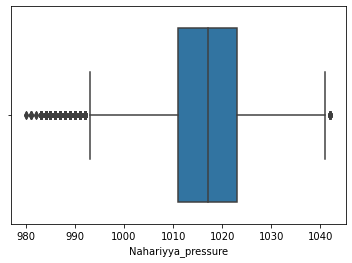

In [12]:
sns.boxplot(x=Nahariyya['Nahariyya_pressure'])

<AxesSubplot:xlabel='Nahariyya_temperature'>

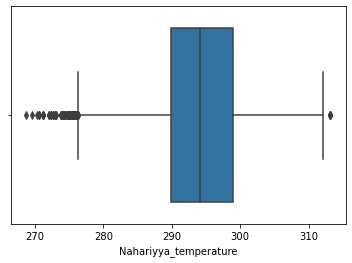

In [13]:
sns.boxplot(x=Nahariyya['Nahariyya_temperature'])

<AxesSubplot:xlabel='Nahariyya_humidity'>

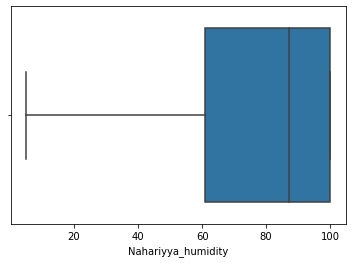

In [14]:
sns.boxplot(x=Nahariyya['Nahariyya_humidity'])

<AxesSubplot:xlabel='Nahariyya_wind_direction'>

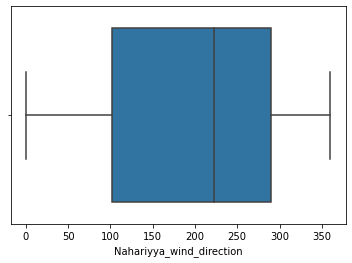

In [15]:
sns.boxplot(x=Nahariyya['Nahariyya_wind_direction'])

<AxesSubplot:xlabel='Nahariyya_wind_speed'>

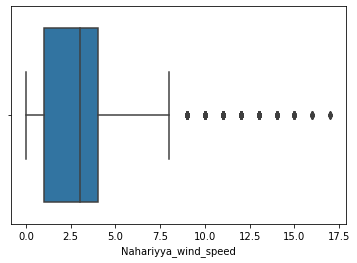

In [16]:
sns.boxplot(x=Nahariyya['Nahariyya_wind_speed'])

In [17]:
Nahariyya.describe()

,Nahariyya_humidity,Nahariyya_pressure,Nahariyya_temperature,Nahariyya_wind_direction,Nahariyya_wind_speed
count,44435.000000,44458.000000,44456.000000,44458.000000,44457.000000
mean,78.607449,1015.901997,294.094803,194.907801,3.024428
std,23.682065,10.238495,6.304118,111.981589,2.124433
min,5.000000,980.000000,268.682000,0.000000,0.000000
25%,61.000000,1011.000000,289.881833,102.000000,1.000000
50%,87.000000,1017.000000,294.150000,223.000000,3.000000
75%,100.000000,1023.000000,298.930000,290.000000,4.000000
max,100.000000,1042.000000,313.150000,360.000000,17.000000


In [19]:
Nahariyya.dropna(inplace=True) #Remove rows with NaN values

In [21]:
Nahariyya[Nahariyya.isna().any(axis=1)].count() #Confirm removal of NaN values

datetime                         0
Nahariyya_humidity               0
Nahariyya_pressure               0
Nahariyya_temperature            0
Nahariyya_weather_description    0
Nahariyya_wind_direction         0
Nahariyya_wind_speed             0
dtype: int64

### Check for insights

<AxesSubplot:>

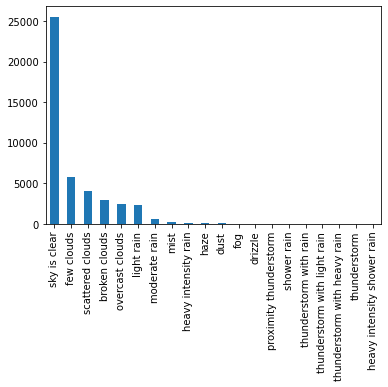

In [22]:
Nahariyya['Nahariyya_weather_description'].value_counts().plot(kind='bar') #Check distribution of target variable

In [23]:
Nahariyya.describe()

,Nahariyya_humidity,Nahariyya_pressure,Nahariyya_temperature,Nahariyya_wind_direction,Nahariyya_wind_speed
count,44432.000000,44432.000000,44432.000000,44432.000000,44432.000000
mean,78.609898,1015.898114,294.095337,194.955978,3.025342
std,23.680569,10.239547,6.304666,111.954661,2.124151
min,5.000000,980.000000,268.682000,0.000000,0.000000
25%,61.000000,1011.000000,289.880000,102.000000,1.000000
50%,87.000000,1017.000000,294.150000,223.000000,3.000000
75%,100.000000,1023.000000,298.932000,290.000000,4.000000
max,100.000000,1042.000000,313.150000,360.000000,17.000000


<AxesSubplot:>

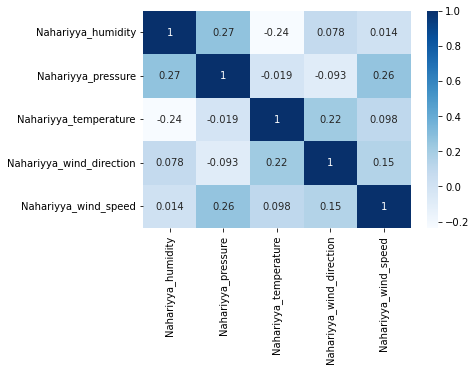

In [24]:
sns.heatmap(Nahariyya.corr(),cbar=True,annot=True,cmap='Blues') #checking for correlation